# 1. Introduction

The client is a provider of communications, high-speed Internet and entertainment services through broadband and fiber transport networks. With over 7,000 employees, this Client serves 2.2 million 
access lines in 25 states. 
This client experienced record growth in High Speed Internet connection sign- ups with a 31% annual increase in subscriptions leading the US in growth. 
This challenge was reflected in high abandon rates of 20%, and with calls being answered with an average speed of answer of 7.5 minutes. The lack of customer accessibility to the support team is an impediment to sustained growth in the competitive HSI market for the client.

Client wants to know what are the factors which contribute to churn. 
They want to have a system through which they could identify such customer which could also help them decide who the one who could not be retained are and the customer who could be retained what should be the appropriate incentive for them. 
Their goal is to bring down the churn rate to the minimum.

**Submitted By : _Shriya Jain_**

# 2. Data Prepration

## 2.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import GradientBoostingClassifier as GBC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score


## 2.2 Load Data

In [2]:
active_data = pd.read_excel('Case_study_data.xlsx',sheet_name=0)
active_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 29 columns):
SITE_ACCOUNT_NUMBER          9998 non-null object
ACCOUNT_STATUS               9998 non-null object
FIRST_COMMUNICATION_DATE     9989 non-null datetime64[ns]
UPGRADE_DATE                 9989 non-null datetime64[ns]
SERVICE_ PLAN                8760 non-null object
MODEL                        9323 non-null object
SALES_CHANNEL                7093 non-null object
DIRECT_INDIRECT_CHANNEL      9954 non-null object
SALES_SOURCE                 9306 non-null object
COMPANY_SOURCE_NAME          9988 non-null object
FIRST_NAME                   9998 non-null object
LAST_NAME                    9998 non-null object
ADDRESS                      9945 non-null object
CITY                         9998 non-null object
STATE                        9977 non-null object
ZIPCODE                      9977 non-null object
EMAIL_ADDRESS                9979 non-null object
FEEDBACK                   

In [3]:
churn_data = pd.read_excel('Case_study_data.xlsx',sheet_name=1)
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
SITE_ACCOUNT_NUMBER          10000 non-null object
ACCOUNT_STATUS               9985 non-null object
FIRST_COMMUNICATION_DATE     10000 non-null datetime64[ns]
CHURN_DATE                   10000 non-null datetime64[ns]
UPGRADE_DATE                 9121 non-null datetime64[ns]
SERVICE_PLAN                 8518 non-null object
MODEL                        9290 non-null object
SALES_CHANNEL                7398 non-null object
DIRECT_INDIRECT_CHANNEL      9216 non-null object
SALES_SOURCE                 9710 non-null object
COMPANY_SOURCE_NAME          9992 non-null object
FIRST_NAME                   9974 non-null object
LAST_NAME                    9993 non-null object
ADDRESS                      9991 non-null object
CITY                         10000 non-null object
STATE                        9955 non-null object
ZIPCODE                      9955 non-null object
EMAIL_ADDRESS 

In [4]:
active_dd = pd.read_excel('Data_dictionary.xlsx',sheet_name=0)
active_dd

,Fields/ Variables,Descriptions,Type,Var_length
0,Site_account_number,Account # (Unique key),char,14
1,ACCOUNT_STATUS,Present Account Status,char,9
2,First_Communication_date,First date of communication,char,12
3,Upgrade_date,Date of Upgradation,char,12
4,SERVICE_PLAN,Plan Used,char,13
5,MODEL,NaN,char,7
6,SALES_CHANNEL,Channel through which the customer was acquired,char,15
7,DIRECT_INDIRECT_CHANNEL,Channel Sub Classification,char,9
8,SALES_SOURCE,NaN,char,51
9,COMPANY_SOURCE_NAME,NaN,char,13


In [5]:
churn_dd = pd.read_excel('Data_dictionary.xlsx',sheet_name=1)
churn_dd

,Fields/ Variables,Descriptions,Type,Var_length
0,Site_account_number,Account # (Unique key),char,14
1,ACCOUNT_STATUS,Present Account Status,char,6
2,First_communication_date,NaN,num,8
3,CHURN_DATE,NaN,num,8
4,Upgrade_date,Date of Upgradation,char,12
5,SERVICE_PLAN,Plan Used,char,13
6,MODEL,NaN,char,7
7,SALES_CHANNEL,Channel through which the customer was acquired,char,15
8,DIRECT_INDIRECT_CHANNEL,Channel Sub Classification,char,9
9,SALES_SOURCE,NaN,char,51


In [6]:
income_dd = pd.read_excel('Data_dictionary.xlsx',sheet_name=2)
income_dd

,Descriptor,Description
0,0,Annual Income < $10K
1,1,Annual Income > $10K < 20K
2,2,Annual Income > $20K < 30K
3,3,Annual Income > $30K < 40K
4,4,Annual Income > $40K < 50K
5,5,Annual Income > $50K < 60K
6,6,Annual Income > $60K < 70K
7,7,Annual Income > $70K < 80K
8,8,Annual Income > $80K < 90K
9,9,Annual Income > $90K < 100K


In [7]:
active_data = pd.read_excel('Case_study_data.xlsx',sheet_name=0)

In [8]:
set(active_data.columns.tolist()) == set(churn_data.columns.tolist())
(set(active_data.columns.tolist()) | set(churn_data.columns.tolist())) - (set(active_data.columns.tolist()) & set(churn_data.columns.tolist()))

False

{u'CHURN_DATE', u'SERVICE_ PLAN', u'SERVICE_PLAN'}

In [9]:
active_data=active_data.rename(columns = {'SERVICE_ PLAN':'SERVICE_PLAN'})
(set(active_data.columns.tolist()) | set(churn_data.columns.tolist())) - (set(active_data.columns.tolist()) & set(churn_data.columns.tolist()))

{u'CHURN_DATE'}

In [10]:
(set(active_data.columns.tolist()) | set(churn_data.columns.tolist())) - (set(active_data.columns.tolist()) & set(churn_data.columns.tolist()))

{u'CHURN_DATE'}

## 2.3 Missing Value Treatment 

In [11]:
pd.concat([active_data.dtypes,active_data.nunique(),np.round((active_data.isna().sum()/active_data.shape[0])*100,2),active_data.iloc[0,:].T],axis=1).sort_values(by=[2])

,0,1,2,0
SITE_ACCOUNT_NUMBER,object,9998,0.01,AMR-11112345
ACCOUNT_STATUS,object,2,0.01,Active
AGE,object,63,0.01,69
DATE_OF_BIRTH,object,7187,0.01,1-5-1943
FIRST_NAME,object,576,0.01,Ace
LAST_NAME,object,878,0.01,FUTRELL
CITY,object,828,0.01,GERMANTOWN
MOST_RECENT_SALES_CHANNEL,object,16,0.07,HN7000 Upgrade
FIRST_COMMUNICATION_DATE,datetime64[ns],334,0.10,2001-11-27 00:00:00
UPGRADE_DATE,datetime64[ns],1519,0.10,2003-12-14 00:00:00


In [12]:
active_data.loc[active_data['DATE_OF_BIRTH'] == u'.','DATE_OF_BIRTH'] = np.nan
active_data.loc[active_data['DATE_OF_BIRTH'] == u'                 4-1-1968','DATE_OF_BIRTH'] = np.nan
active_data['DATE_OF_BIRTH'] = active_data['DATE_OF_BIRTH'].fillna(active_data['DATE_OF_BIRTH'].mode()[0])
active_data.loc[active_data['AGE'] == u'.','AGE'] = np.nan
active_data['AGE'] = active_data['AGE'].fillna(active_data['AGE'].mode()[0])

def check_dt(x):
    try:
        x = pd.to_datetime(x,format='%d-%m-%Y')
        return(x)
    except Exception as ex:
        print('Unexpected Error : '+ex.message)
        return(x)
        
active_data['DATE_OF_BIRTH'] = active_data['DATE_OF_BIRTH'].apply(lambda x : check_dt(x)) 


In [13]:
for col in active_data.columns:
    if active_data[col].nunique() < 30:
        active_data[col].value_counts()

Active      9985
Inactive      13
Name: ACCOUNT_STATUS, dtype: int64

Proplus      1272
Basic_Ltd    1268
Basic        1263
Elite        1256
Power150     1248
Home         1243
Pro          1210
Name: SERVICE_PLAN, dtype: int64

HN7000S    4296
HN9000     1985
UNK         977
DW4020      655
DW4000      645
DW6000      514
DW7000      251
Name: MODEL, dtype: int64

Sales Agents     1454
Retail/others    1445
Vars             1421
Web orders       1391
Call Center      1382
Name: SALES_CHANNEL, dtype: int64

Indirect    7626
Direct      2319
0              9
Name: DIRECT_INDIRECT_CHANNEL, dtype: int64

HNS Customers    9988
Name: COMPANY_SOURCE_NAME, dtype: int64

GOOD    5031
BAD     3054
Name: FEEDBACK, dtype: int64

Broadband Remote    7755
Spaceway            2233
Name: SITE_TYPE_DESC, dtype: int64

0                                                8519
EXPRESS REPAIR HOME WITH TERM                     295
EXPRESS REPAIR HOME WITH COMMITMENT WITH TERM      52
EXPRESS REPAIR BASIC                               50
EXPRESS REPAIR HOME                                44
EXPRESS REPAIR BUSINESS WITH TERM                  38
EXPRESS REPAIR HOME W/O COMMITMENT WITH TERM       20
SRVC ASSUR STD EXISTING CUST NO COMMIT             17
SRVC ASSUR STD NEW CUST                             7
Name: WARRANTY_NAME, dtype: int64

HN7000 Upgrade           1709
Direct                   1499
Dealer-Generated Sale    1292
DW6000 Upgrade           1076
DPC Classic upgrade       995
Retail                    995
HN9000 Upgrade            707
DW7000 Upgrade            498
National Sales            368
Retail                    271
Classic Migration         259
Dial Return Upgrade       214
UNKNOWN                    76
Used Equipment             14
0                          13
Business Edition            6
Name: MOST_RECENT_SALES_CHANNEL, dtype: int64

1.0    4765
2.0    3963
Name: GENDER, dtype: int64

0    2734
6    1545
7    1015
4     963
5     876
3     669
8     597
9     464
A     193
2     169
D     158
1     156
C      99
B      43
Name: INCOME, dtype: int64

0.0    4654
1.0    4510
2.0     516
Name: MARITAL_STATUS, dtype: int64

0.0    6643
1.0    2041
Name: PRESENCE_OF_CHILDREN, dtype: int64

N    5819
Y    1125
Name: COMPUTER_OWNER, dtype: int64

    -DIRECT_INDIRECT_CHANNEL : Drop 0
    -COMPANY_SOURCE_NAME : Drop column
    -WARRANTY_NAME : 0 assume to be No Warranty
    -MOST_RECENT_SALES_CHANNEL : Contains 0 and UNKNOWN consider as different category

In [14]:
active_data = active_data.drop(columns=['COMPANY_SOURCE_NAME'])
active_data = active_data[active_data.DIRECT_INDIRECT_CHANNEL != 0]

In [15]:
active_data['ACCOUNT_STATUS'] = active_data['ACCOUNT_STATUS'].fillna('Active')

In [16]:
drop_na_rows = active_data.columns.T[active_data.isna().sum()/active_data.shape[0] < .01]
active_data = active_data.dropna(subset=drop_na_rows)

In [17]:
active_data.columns.T[active_data.isna().sum()/active_data.shape[0] > 0]

Index([        u'SERVICE_PLAN',                u'MODEL',
              u'SALES_CHANNEL',         u'SALES_SOURCE',
                   u'FEEDBACK',            u'SATELLITE',
              u'WARRANTY_NAME',               u'GENDER',
                     u'INCOME',       u'MARITAL_STATUS',
       u'PRESENCE_OF_CHILDREN',       u'COMPUTER_OWNER'],
      dtype='object')

In [18]:
def fill_na_mode(df,col):
    df[col] = df[col].fillna(df[col].mode()[0])
    return(df)

In [19]:
fill_mode_cols = active_data.columns.T[active_data.isna().sum()/active_data.shape[0] > 0].tolist()
# Treat na as other cateogory
fill_mode_cols.remove('SERVICE_PLAN')
fill_mode_cols.remove('SALES_CHANNEL')
fill_mode_cols
for col in fill_mode_cols:
    active_data = fill_na_mode(active_data,col)

[u'MODEL',
 u'SALES_SOURCE',
 u'FEEDBACK',
 u'SATELLITE',
 u'WARRANTY_NAME',
 u'GENDER',
 u'INCOME',
 u'MARITAL_STATUS',
 u'PRESENCE_OF_CHILDREN',
 u'COMPUTER_OWNER']

In [20]:
active_data['SERVICE_PLAN'] = active_data['SERVICE_PLAN'].fillna('UNKNOWN')
active_data['SALES_CHANNEL'] = active_data['SALES_CHANNEL'].fillna('UNKNOWN')

In [21]:
pd.concat([churn_data.dtypes,churn_data.nunique(),np.round((churn_data.isna().sum()/churn_data.shape[0])*100,2),churn_data.iloc[0,:].T],axis=1).sort_values(by=[2])

,0,1,2,0
SITE_ACCOUNT_NUMBER,object,10000,0.00,AMR-53205840
INCOME,object,14,0.00,0
CHURN_DATE,datetime64[ns],2577,0.00,2006-04-02 00:00:00
CITY,object,553,0.00,TRINITY
FIRST_COMMUNICATION_DATE,datetime64[ns],156,0.00,2002-01-18 00:00:00
LAST_NAME,object,893,0.07,Branson
DATE_OF_BIRTH,object,7597,0.08,27-10-1964
COMPANY_SOURCE_NAME,object,1,0.08,HNS Customers
AGE,float64,65,0.08,48
ADDRESS,object,993,0.09,826 Nesom Rd.


In [22]:
churn_data_bkp = pd.DataFrame(churn_data)

In [23]:
churn_data = pd.DataFrame(churn_data_bkp)

In [24]:
for col in churn_data.columns:
    if churn_data[col].nunique() < 30:
        churn_data[col].value_counts()

Closed    9985
Name: ACCOUNT_STATUS, dtype: int64

Elite                1795
SO                   1184
Home                 1122
Professional          780
Basic_Ltd             666
Proplus               664
Power15               624
Basic                 623
Pro                   555
Professional Plus     505
Name: SERVICE_PLAN, dtype: int64

HN9000     2850
HN7000S    1899
DW4000     1618
DW7000     1500
DW6000     1380
UNK          43
Name: MODEL, dtype: int64

Call Centers     1675
Retail/Others    1576
Web Orders       1419
Sales Agents     1371
Vars             1357
Name: SALES_CHANNEL, dtype: int64

Indirect    6411
Direct      2805
Name: DIRECT_INDIRECT_CHANNEL, dtype: int64

HNS Customers    9992
Name: COMPANY_SOURCE_NAME, dtype: int64

BAD     5053
GOOD    2919
Name: FEEDBACK, dtype: int64

SPACEWAY3      2458
G3C-VER-24K     977
SM6-HOR-10K     807
HZN-HOR-8K      601
G16-VER-15K     521
SM5-VER-7K      518
G28-HOR-16K     517
AM6-HOR-21K     504
G26-HOR-14K     475
G28-HOR-10K     428
HZN-VER-23K     427
AMC-VER-5K      418
AM9-HOR-17K     336
Name: SATELLITE, dtype: int64

Spaceway            6113
Broadband Remote    3824
Name: SITE_TYPE_DESC, dtype: int64

0                                               6116
EXPRESS REPAIR BASIC                            2472
EXPRESS REPAIR HOME WITH TERM                    303
SRVC ASSUR STD NEW CUST                          298
Broadband Remote                                  39
SRVC ASSUR PLUS NEW CUST                          28
EXPRESS REPAIR BUSINESS WITH TERM                 23
Spaceway                                          16
EXPRESS REPAIR HOME                               14
EXPRESS REPAIR HOME W/O COMMITMENT WITH TERM      10
Name: WARRANTY_NAME, dtype: int64

Direct                   4175
Hughes Sales Agents      3825
Dealer - Direct Order     623
Used Equipment            291
Dealer-Generated Sale     205
HN7000 Upgrade            166
DW6000 Upgrade            137
National Sales            112
Retail                     97
Distributor Sales Age      77
DPC Classic upgrade        74
DW7000 Upgrade             55
0                          46
UNKNOWN                    34
Retail - Direct Order      31
Business Edition           20
EXPRESS REPAIR BASIC       11
Name: MOST_RECENT_SALES_CHANNEL, dtype: int64

1.0    4982
2.0    3780
Name: GENDER, dtype: int64

0    2326
3    1440
5    1175
4    1171
6    1103
A     551
7     421
2     383
8     379
D     272
9     234
1     228
C     179
B     138
Name: INCOME, dtype: int64

.    3341
0    3053
1    2841
2     484
Name: MARITAL_STATUS, dtype: int64

0.0    5420
1.0    3328
Name: PRESENCE_OF_CHILDREN, dtype: int64

Y    3932
N    2825
Name: COMPUTER_OWNER, dtype: int64

    - COMPANY_SOURCE_NAME : Drop column
    - MARITAL_STATUS : Treat . as UNKNOWN

In [25]:
churn_data = churn_data.drop(columns=['COMPANY_SOURCE_NAME','CHURN_DATE'])
churn_data['ACCOUNT_STATUS'] = churn_data['ACCOUNT_STATUS'].fillna('Closed')

In [26]:
drop_na_rows = churn_data.columns.T[churn_data.isna().sum()/churn_data.shape[0] < .01]
churn_data = churn_data.dropna(subset=drop_na_rows)

In [27]:
def check_dt(x):
    try:
        x = pd.to_datetime(x,format='%d-%m-%Y')
        return(x)
    except Exception as ex:
        print('Unexpected Error : '+ex.message)
        return(x)
        
churn_data['DATE_OF_BIRTH'] = churn_data['DATE_OF_BIRTH'].apply(lambda x : check_dt(x)) 


In [28]:
def check_dt(x):
    try:
        x = pd.to_datetime(x,format='%d-%m-%Y')
        return(x)
    except Exception as ex:
        print('Unexpected Error : '+ex.message)
        return(x)
        
churn_data['UPGRADE_DATE'] = churn_data['UPGRADE_DATE'].apply(lambda x : check_dt(x)) 

churn_data['UPGRADE_DATE'] = churn_data['UPGRADE_DATE'].fillna(churn_data['UPGRADE_DATE'].value_counts().index[0])


In [29]:
fill_mode_cols = churn_data.columns.T[churn_data.isna().sum()/churn_data.shape[0] > 0].tolist()
# Treat na as other cateogory
fill_mode_cols.remove('SERVICE_PLAN')
fill_mode_cols.remove('SALES_CHANNEL')
fill_mode_cols
for col in fill_mode_cols:
    churn_data = fill_na_mode(churn_data,col)

[u'MODEL',
 u'DIRECT_INDIRECT_CHANNEL',
 u'SALES_SOURCE',
 u'FEEDBACK',
 u'SATELLITE',
 u'WARRANTY_NAME',
 u'GENDER',
 u'MARITAL_STATUS',
 u'PRESENCE_OF_CHILDREN',
 u'COMPUTER_OWNER']

In [30]:
churn_data['SERVICE_PLAN'] = churn_data['SERVICE_PLAN'].fillna('UNKNOWN')
churn_data['SALES_CHANNEL'] = churn_data['SALES_CHANNEL'].fillna('UNKNOWN')

In [31]:
active_data.shape
churn_data.shape
final_df = pd.concat([active_data,churn_data],axis=0)
final_df.shape

(9828, 28)

(9824, 28)

(19652, 28)

## 2.4 Label encoding and One hot encoding

In [32]:
pd.set_option('display.max_rows', 500)
pd.concat([final_df.dtypes,final_df.nunique(),np.round((final_df.isna().sum()/final_df.shape[0])*100,2),final_df.iloc[0,:].T],axis=1).sort_values(by=[1])

,0,1,2,0
COMPUTER_OWNER,object,2,0.0,N
DIRECT_INDIRECT_CHANNEL,object,2,0.0,Indirect
GENDER,float64,2,0.0,2
SITE_TYPE_DESC,object,2,0.0,Broadband Remote
PRESENCE_OF_CHILDREN,float64,2,0.0,0
FEEDBACK,object,2,0.0,GOOD
ACCOUNT_STATUS,object,3,0.0,Active
MARITAL_STATUS,object,4,0.0,1
MODEL,object,7,0.0,HN9000
SALES_CHANNEL,object,9,0.0,Vars


In [33]:
final_df = final_df.drop(columns=['SITE_ACCOUNT_NUMBER'])

In [34]:
final_df.nunique().sort_values()

COMPUTER_OWNER                   2
GENDER                           2
SITE_TYPE_DESC                   2
FEEDBACK                         2
PRESENCE_OF_CHILDREN             2
DIRECT_INDIRECT_CHANNEL          2
ACCOUNT_STATUS                   3
MARITAL_STATUS                   4
MODEL                            7
SALES_CHANNEL                    9
WARRANTY_NAME                   12
SERVICE_PLAN                    12
INCOME                          14
MOST_RECENT_SALES_CHANNEL       21
SATELLITE                       45
STATE                           47
AGE                             68
SALES_SOURCE                   150
FIRST_COMMUNICATION_DATE       464
CITY                           826
ZIPCODE                        896
LAST_NAME                     1696
FIRST_NAME                    1757
UPGRADE_DATE                  2652
ADDRESS                      10789
DATE_OF_BIRTH                11600
EMAIL_ADDRESS                19522
dtype: int64

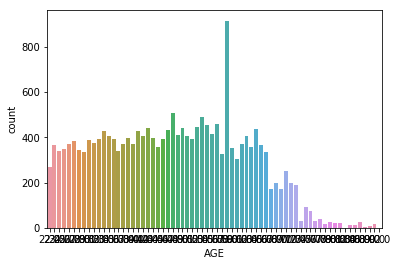

In [35]:
sns.countplot(final_df.AGE)

In [36]:
le_cols = ['COMPUTER_OWNER','GENDER','SITE_TYPE_DESC','FEEDBACK','PRESENCE_OF_CHILDREN','DIRECT_INDIRECT_CHANNEL','INCOME','SATELLITE','STATE','SALES_SOURCE','CITY','FIRST_NAME','LAST_NAME','ADDRESS']

for col in le_cols:
    final_df[col] = LabelEncoder().fit_transform(final_df[col])
    

In [37]:
final_df.loc[final_df['ACCOUNT_STATUS'] == 'Active','ACCOUNT_STATUS'] = 0
final_df.loc[final_df['ACCOUNT_STATUS'] == 'Closed','ACCOUNT_STATUS'] = 1
final_df.loc[final_df['ACCOUNT_STATUS'] == 'Inactive','ACCOUNT_STATUS'] = 1

In [38]:
final_df.ACCOUNT_STATUS.value_counts()

1    9837
0    9815
Name: ACCOUNT_STATUS, dtype: int64

In [39]:
def create_dummies(df,col):
    df_dum = pd.get_dummies(df[col],prefix=col)
    df = pd.concat([df,df_dum],axis=1)
    df = df.drop(columns=[col],axis=1)
    return(df)

In [40]:
dum_cols = ['MARITAL_STATUS','MODEL','SALES_CHANNEL','WARRANTY_NAME','SERVICE_PLAN','MOST_RECENT_SALES_CHANNEL']

for col in dum_cols:
    final_df = create_dummies(final_df,col)

In [41]:
def check_dt(x):
    try:
        x = pd.to_datetime(x,format='%d-%m-%Y')
        return(x.toordinal())
    except Exception as ex:
        print('Unexpected Error : '+ex.message)
        return(x)
        
final_df['FIRST_COMMUNICATION_DATE'] = final_df['FIRST_COMMUNICATION_DATE'].apply(lambda x : check_dt(x)) 
final_df['UPGRADE_DATE'] = final_df['UPGRADE_DATE'].apply(lambda x : check_dt(x)) 
final_df['DATE_OF_BIRTH'] = final_df['DATE_OF_BIRTH'].apply(lambda x : check_dt(x)) 


In [42]:
final_df['AGE'] = final_df['AGE'].astype(int)

## 2.5 Correlation

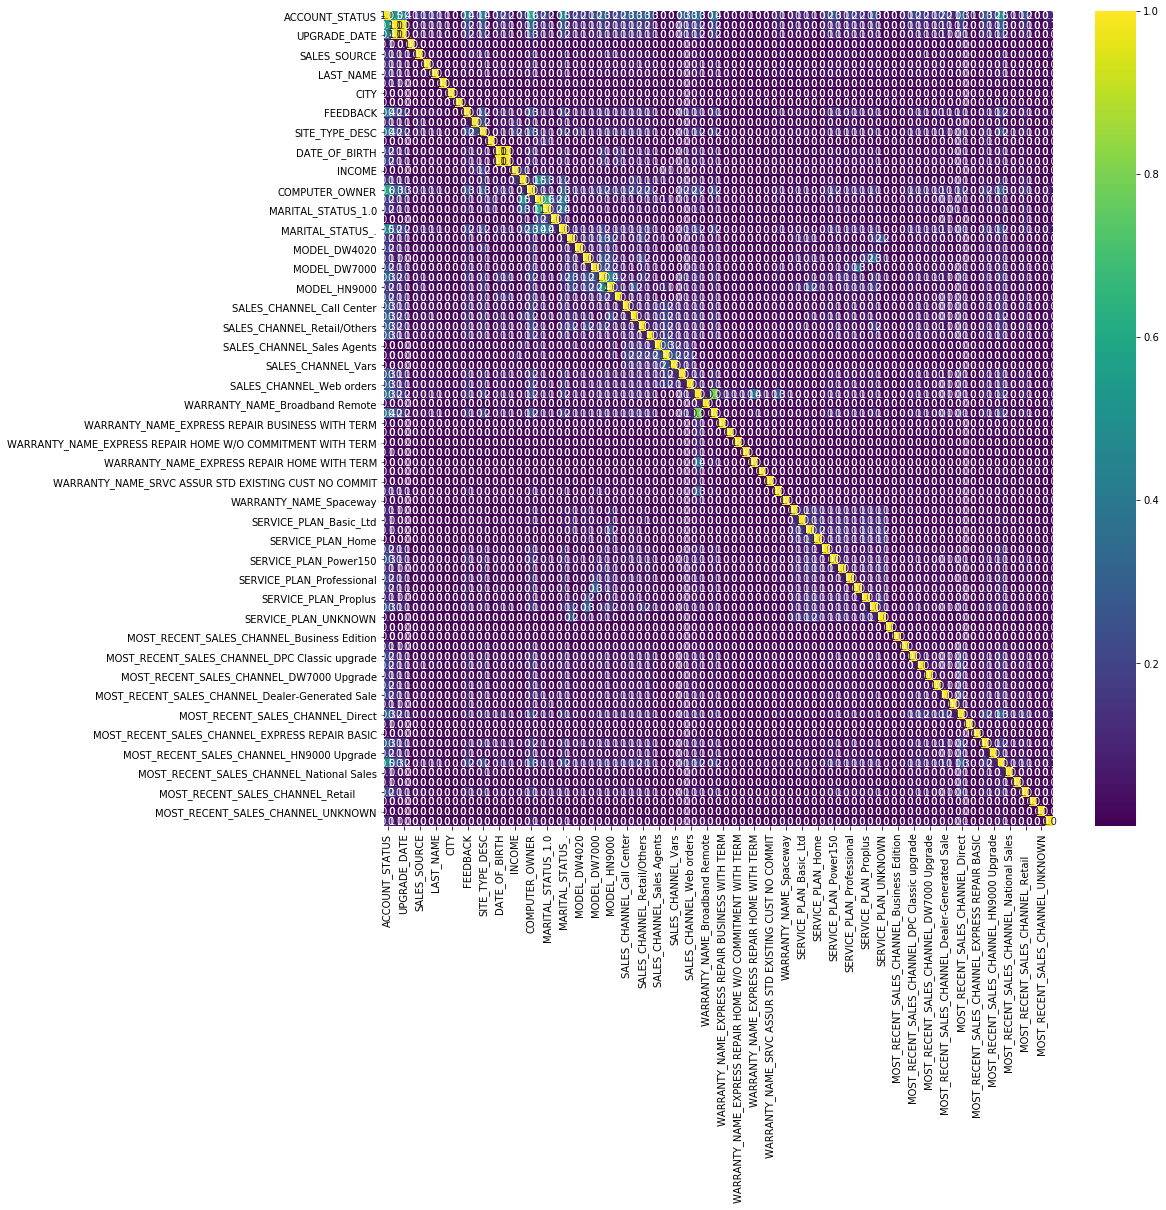

In [43]:
# Identifying columns with pearson correlation coefficient more than .8 

corrs = final_df.corr()
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(corrs.abs(),cmap='viridis', fmt=".1f",annot=True , ax=ax)

    - AGE and DATE_OF_BIRTH are highly correlated dropping DATE_OF_BIRTH
    - FIRST_COMMUNICATION_DATE and UPGRADE_DATE are highly correlated but ACCOUNT_STATUS is more correlated to FIRST_COMMUNICATION_DATE so dropping UPGRADE_DATE
    - ACCOUNT_STATUS is more correlated to COMPUTER_OWNER,MARITAL_STATUS,SITE_TYPE_DESC,FEEDBACK,FIRST_COMMUNICATION_DATE
    - FIRST_NAME is highly correlated to EMAIL_ADDRESS so dropping EMAIL_ADDRESS

In [44]:
final_df = final_df.drop(columns=['DATE_OF_BIRTH','UPGRADE_DATE','EMAIL_ADDRESS'])

In [45]:
def to_int(x):
    try:
        x = int(x)
        return(x)
    except Exception as ex:
        print(ex.message)
        return(0)
for col in final_df.columns:
    final_df[col] = final_df[col].apply(lambda x : to_int(x)) 


C:\Users\Shriya\Software\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: BaseException.message has been deprecated as of Python 2.6
  


invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid lit

# 3. Building Models

## 3.1 Splitting Data into Train, Validation and Test data

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(
    final_df.drop(columns=['ACCOUNT_STATUS']), final_df['ACCOUNT_STATUS'], test_size=0.2, random_state=0)
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X_train, Y_train, test_size=0.25, random_state=0)

## 3.2 Scaling data for different models

In [47]:
for data in [X_train,X_validation,X_test] :
    data = data.astype(np.float)
    scaler = StandardScaler()
    data = scaler.fit_transform(data)


## 3.3 Applying Models

- Suuport Vector Machines
    - It is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples.
<br><br> 
- Random Forest Classifier
    - It creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.
<br><br> 
- Logistic Regression
    - Logistic regression models the probability of the default class of dependent variable
<br><br>     
- Gradient Boost Classifier
    - It repetitively leverage the patterns in residuals and strengthen a model with weak predictions and make it better. Once we reach a stage that residuals do not have any pattern that could be modeled, we can stop modeling residuals (otherwise it might lead to overfitting). Algorithmically, we are minimizing our loss function, such that test loss reach its minima

In [48]:
# Applying different models and storing metrics in scores dataframe

# Evaluates different metrics based on target variable and predicted values
def get_scores(classifiers,**kwargs):
    scores = pd.DataFrame()
    
    for name,classifier in classifiers.items():
        clf = classifier(**kwargs)
        clf.fit(X_train,Y_train)
        
        col = pd.Series()
        types = {'Train' : [Y_train,clf.predict(X_train)],'Validation' : [Y_validation,clf.predict(X_validation)],'Test' : [Y_test,clf.predict(X_test)]}
        for type_name,values in types.items():
            col['Confusion matrix'] = confusion_matrix(values[0],values[1])
            col['Accuracy score'] =accuracy_score(values[0],values[1])
            col['F1 score'] = f1_score(values[0],values[1],average='binary')
            col['ROC AUC Score'] = roc_auc_score(values[0],values[1])
            col['Average Precision score'] = average_precision_score(values[0],values[1])
            col['Recall Score'] = recall_score(values[0],values[1])

            scores[name+'_'+type_name] =  col
    return(scores)

In [49]:
classifiers = {'Support Vector Machines':SVC,\
              'Random Forest Classifier':RFC,\
              'K Neighbors Classifier':KNC,\
              'Logistic Regression':LR,\
              'Gradient Boosting Classifier':GBC}

scores = get_scores(classifiers)
scores = scores.T

C:\Users\Shriya\Software\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Shriya\Software\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shriya\Software\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shriya\Software\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWa

## 3.4 Comparing Metrics

**Evaluation Metrics :**
- Accuracy Score
    - Accuracy = TP+TN/TP+FP+FN+TN
<br><br>
- F1 Score
    - F1 Score = 2*(Recall * Precision) / (Recall + Precision)
<br><br>
- ROC AUC Score
    - The Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate (% bads rejected) vs. the false positive rate (% goods rejected) found over a set of predictions.
    - TPR = TP/(TP + FN) 
    - FPR = FP/(FP + TN)
    - (ROC AUC) is just the area under the ROC curve. The higher it is, the better the model is.
<br><br>
- Average Precision Score
    - Precision = TP/TP+FP
<br><br>
- Recall Score
    - Recall = TP/TP+FN

In [50]:
scores.reindex([index for index in scores.index if 'Train' in index]).sort_values(by=scores.columns.tolist()[1:],ascending=[False for item in scores.columns][1:])
scores.reindex([index for index in scores.index if 'Validation' in index]).sort_values(by=scores.columns.tolist()[1:],ascending=[False for item in scores.columns][1:])
scores.reindex([index for index in scores.index if 'Test' in index]).sort_values(by=scores.columns.tolist()[1:],ascending=[False for item in scores.columns][1:])


,Confusion matrix,Accuracy score,F1 score,ROC AUC Score,Average Precision score,Recall Score
Support Vector Machines_Train,"[[5943, 0], [0, 5847]]",1,1,1,1,1
Random Forest Classifier_Train,"[[5943, 0], [5, 5842]]",0.999576,0.999572,0.999572,0.999569,0.999145
Gradient Boosting Classifier_Train,"[[5937, 6], [38, 5809]]",0.996268,0.996227,0.996246,0.995699,0.993501
Logistic Regression_Train,"[[5726, 217], [284, 5563]]",0.957506,0.956911,0.957457,0.939797,0.951428
K Neighbors Classifier_Train,"[[5878, 65], [915, 4932]]",0.916879,0.909627,0.916286,0.910145,0.843509


,Confusion matrix,Accuracy score,F1 score,ROC AUC Score,Average Precision score,Recall Score
Random Forest Classifier_Validation,"[[1932, 3], [12, 1984]]",0.996184,0.996234,0.996219,0.99554,0.993988
Gradient Boosting Classifier_Validation,"[[1931, 4], [12, 1984]]",0.99593,0.995984,0.99596,0.995041,0.993988
Logistic Regression_Validation,"[[1884, 51], [99, 1897]]",0.961842,0.961968,0.962022,0.950703,0.950401
K Neighbors Classifier_Validation,"[[1890, 45], [364, 1632]]",0.895955,0.888647,0.89719,0.888292,0.817635
Support Vector Machines_Validation,"[[1935, 0], [1996, 0]]",0.492241,0,0.5,0.507759,0


,Confusion matrix,Accuracy score,F1 score,ROC AUC Score,Average Precision score,Recall Score
Gradient Boosting Classifier_Test,"[[1935, 2], [19, 1975]]",0.994658,0.994712,0.994719,0.994303,0.990471
Random Forest Classifier_Test,"[[1931, 6], [18, 1976]]",0.993895,0.993964,0.993938,0.992552,0.990973
Logistic Regression_Test,"[[1870, 67], [110, 1884]]",0.954973,0.955133,0.955122,0.94037,0.944835
K Neighbors Classifier_Test,"[[1881, 56], [363, 1631]]",0.893411,0.886172,0.894522,0.883145,0.817954
Support Vector Machines_Test,"[[1937, 0], [1994, 0]]",0.49275,0,0.5,0.50725,0


**Training Data**
    - SVM has the best scores
**Validation Data**
    - Gradient Boosting Classifier has the best scores
**Test Data**
    - Gradient Boosting Classifier has the best scores
    
_Since Gradient Boosting Classifier has best metrics compared to other models on validation and test data.<br>
**Gradient Boosting Classifier** is the final model selected_

## 3.5 Final Model

**Gradient Boosting Classifier is the final model selected**

In [51]:
scores.reindex(['Gradient Boosting Classifier_Train','Gradient Boosting Classifier_Validation','Gradient Boosting Classifier_Test'])

,Confusion matrix,Accuracy score,F1 score,ROC AUC Score,Average Precision score,Recall Score
Gradient Boosting Classifier_Train,"[[5937, 6], [38, 5809]]",0.996268,0.996227,0.996246,0.995699,0.993501
Gradient Boosting Classifier_Validation,"[[1931, 4], [12, 1984]]",0.99593,0.995984,0.99596,0.995041,0.993988
Gradient Boosting Classifier_Test,"[[1935, 2], [19, 1975]]",0.994658,0.994712,0.994719,0.994303,0.990471


- Gradient Boosting Classifier has good Recall Score as compared to Precision score for validation and test data.
- Since we are looking for customers who are going to churn we prefer to have **Low False Negative** (FN = Predicted customer won't churn but customer discontinues the service) which is captured in Recall Score. High Recall implies low FN.
- Rather than Precision Score which captures False Positive (FP = Predicted customer would churn but customer continued the service). 

Text(0.5,1,'Confusion matrix for Gradient Boosting Classifier_Train Data')

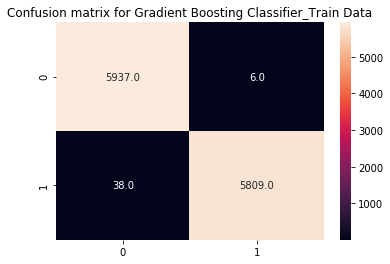

Text(0.5,1,'Confusion matrix for Gradient Boosting Classifier_Validation Data')

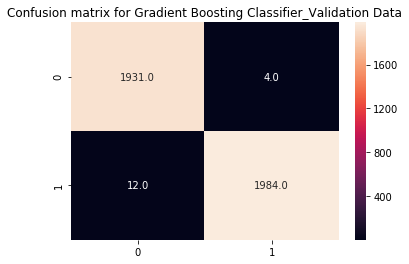

Text(0.5,1,'Confusion matrix for Gradient Boosting Classifier_Test Data')

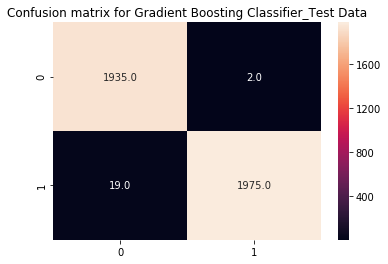

In [52]:
for col in ['Gradient Boosting Classifier_Train','Gradient Boosting Classifier_Validation','Gradient Boosting Classifier_Test']:
    plt.title('Confusion matrix for '+col+' Data')
    sns.heatmap(scores.loc[col,'Confusion matrix'], fmt=".1f",annot=True)
    plt.show()